## Exercise 1: read an image, create a cutout, and examine histogram   
Download the file `ibkf10020_drz.fits` from the Canvas site. This is a Hubble Space Telescope Wide Field Camera 3 (WFC3) image of the remnant of supernova 1987a in the “wide Hα + [NIII]” filter (F657N).  
1. Read in the file and store the first image as a `CCDData` object. The image header has `BUNIT = 'ELECTRONS/S'`, but this doesn't correspond to a valid AstroPy unit, so set the unit to `1/s`.



In [1]:
#Code Here
from astropy.nddata import CCDData as CCD
import astropy.units as u
img = CCD.read('ibkf10020_drz.fits', unit = '1/s')


INFO: first HDU with data is extension 1. [astropy.nddata.ccddata]
INFO: using the unit 1/s passed to the FITS reader instead of the unit ELECTRONS/S in the FITS file. [astropy.nddata.ccddata]


2. Cut out a 2 by 2.5 arcsec region around the coordinates RA = 5h35m28.09s, Dec = -69d16m10.85s.


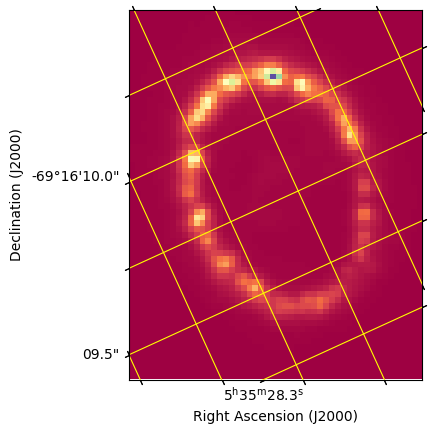

In [2]:
#Code Here
from astropy.coordinates import SkyCoord
from astropy.nddata import Cutout2D
import astropy.wcs
import numpy as np
import matplotlib.pyplot as plt
cut_ctr = SkyCoord('5h35m28.09s', '-69d16m10.85s')
cut_dims = np.array([2.5,2])*u.arcsec
cut = Cutout2D(img.data,cut_ctr,cut_dims,wcs=img.wcs)
plt.subplot(projection=cut.wcs)
plt.grid(color="yellow",ls='solid')
plt.xlabel("Right Ascension (J2000)")
plt.ylabel("Declination (J2000)")
plt.imshow(cut.data,origin='lower',cmap="Spectral")

3. Now plot two histograms of the cutout data values. (You will need to flatten or ravel the 2D array into a 1D array to get what we want out of `plt.hist()`.) The first plot should be based on the raw data values (call them `x`), and the second should be based on

   $$
   Y = \frac{\log(1000X + 1)}{\log 1001}
   $$

Use 100 bins.

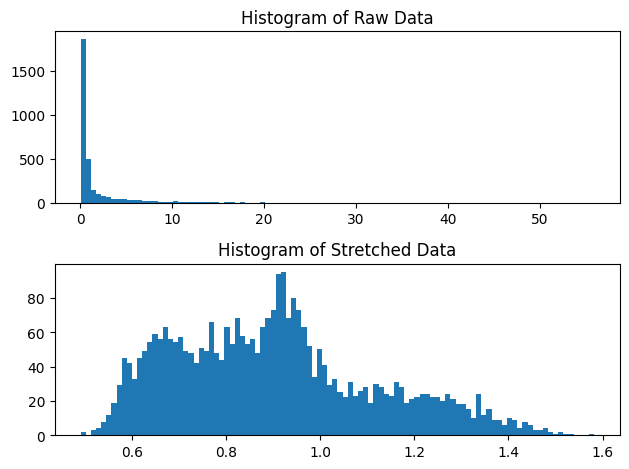

In [3]:
#Code Here
fig, p = plt.subplots(2)

p[0].hist(cut.data.flatten(),bins=100)
p[0].set_title("Histogram of Raw Data")
Y = np.log10(1000*cut.data.flatten() + 1)/np.log10(1001)
p[1].hist(Y,bins=100)
p[1].set_title("Histogram of Stretched Data")
plt.tight_layout()



## Exercise 2: plot the image and cutout
Now plot the image using the correct WCS, using a logarithmic stretch. Plot the outline of the cutout region on the main image and display the cutout in its own subplot. You should be able to produce a plot like the following (check pdf).


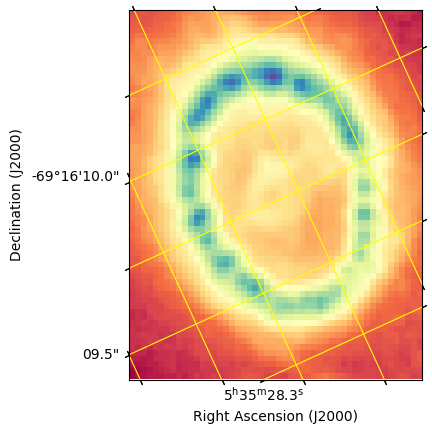

In [12]:
#Code Here
cutcopy = cut.data
logcut = (np.log10(1000*cutcopy+1)/(np.log10(1001)))

plt.subplot(projection=cut.wcs)
plt.grid(color="yellow",ls='solid')
plt.xlabel("Right Ascension (J2000)")
plt.ylabel("Declination (J2000)")
plt.imshow(logcut,origin='lower',cmap='Spectral')

C:\Users\Maxwell Fazen\AppData\Local\Temp\ipykernel_6348\772513933.py:2: RuntimeWarning: invalid value encountered in log10
  logimg = (np.log10(1000*img.data+1)/(np.log10(1001)))


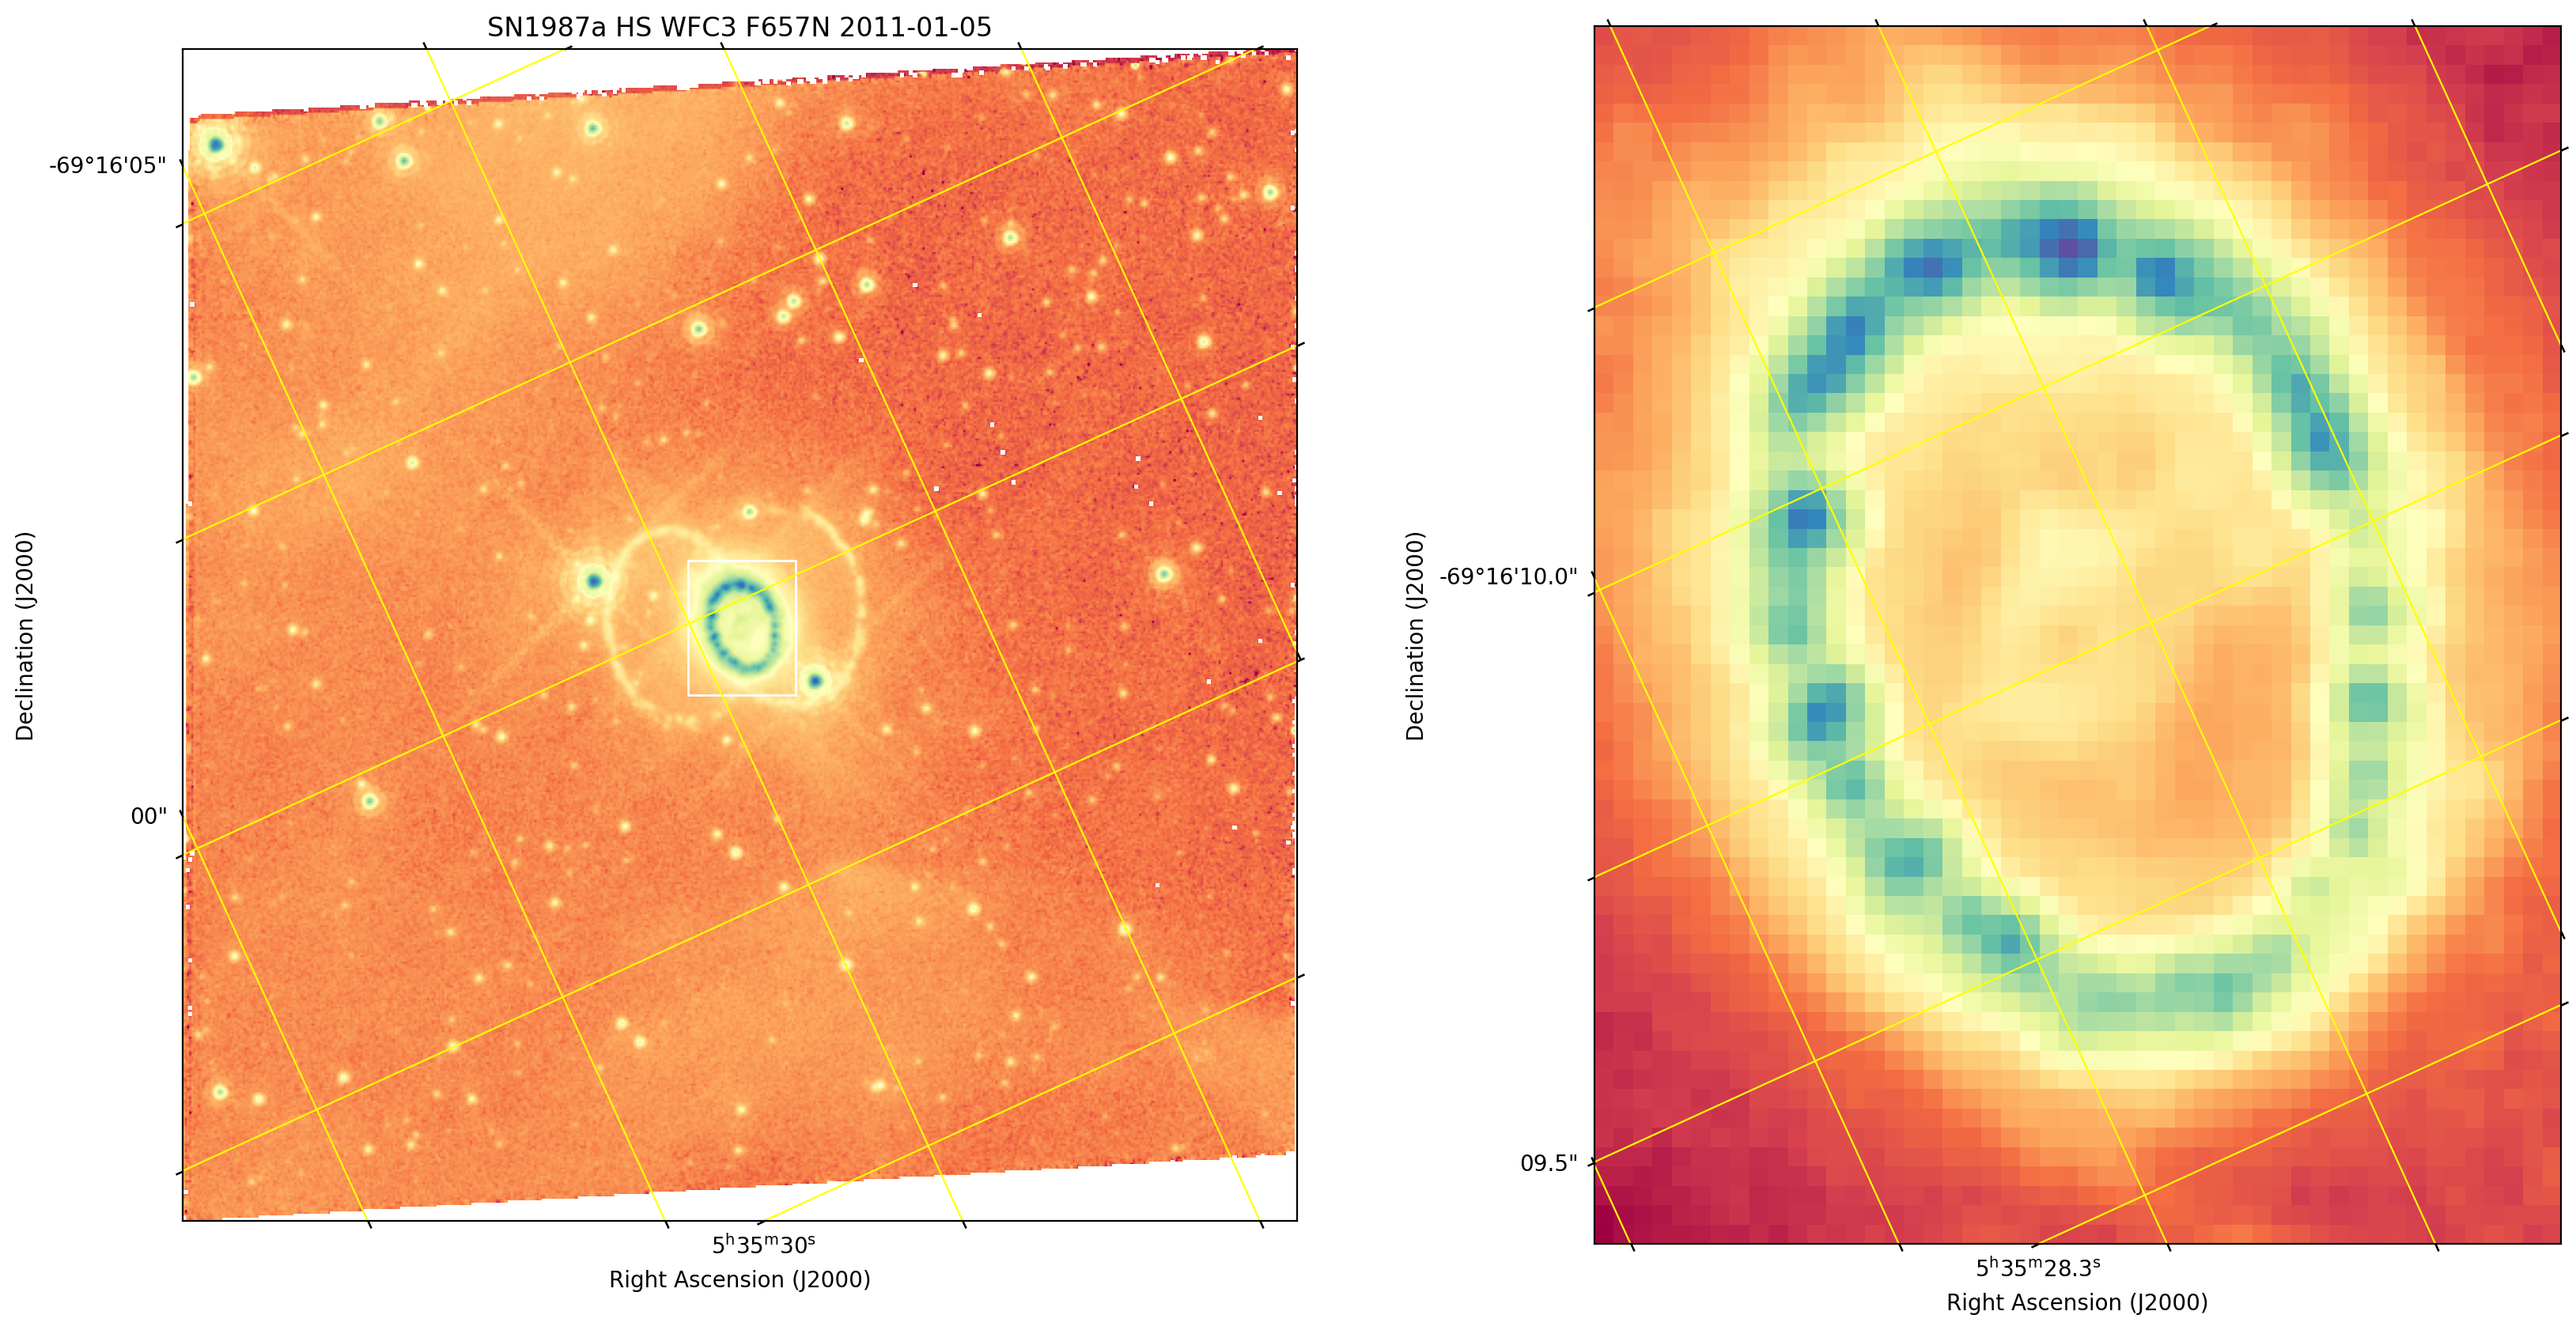

In [5]:
from matplotlib.patches import Rectangle
logimg = (np.log10(1000*img.data+1)/(np.log10(1001)))

fig =plt.figure(figsize=(20,10),dpi=200)
ax1=fig.add_subplot(121,projection=img.wcs)

centx,centy=img.wcs.world_to_pixel(cut_ctr)
box_x = centx - cut.shape[1]/2
box_y = centy - cut.shape[0]/2

cutoutline = Rectangle((box_x,box_y),cut.shape[1],cut.shape[0],edgecolor='w',facecolor='none')
ax1.add_patch(cutoutline)
ax1.coords.grid(True,color="yellow",ls='solid')
ax1.imshow(logimg,origin='lower',cmap='Spectral',vmin=0)
ax1.set_title("SN1987a HS WFC3 F657N 2011-01-05")
ax1.set_xlabel("Right Ascension (J2000)")
ax1.set_ylabel("Declination (J2000)")

ax2=fig.add_subplot(122,projection=cut.wcs)
ax2.coords.grid(color="yellow",ls='solid')
ax2.imshow(logcut,origin='lower',cmap='Spectral')
ax2.set_xlabel("Right Ascension (J2000)")
ax2.set_ylabel("Declination (J2000)")
plt.show()


2. Cut out a 2 by 2.5 arcsec region around the coordinates RA = 5h35m28.09s, Dec = -69d16m10.85s.


## Exercise 3: further analysis  
Now take the cutout data from the SN1987a image and perform the following analysis on the unstretched cutout data.  
1. Create a calibrated copy of the cutout region: convert the cutout data to `erg/cm^2/s/Angstrom/pixel` by multiplying by the image header's `PHOTFLAM` value, which is given in `erg/cm^2/Angstrom` (actually per electron).  
    


In [6]:
#Code Here
PHOTFLAM = img.header["PHOTFLAM"]
cutoutcalibration = cut.data*PHOTFLAM
calsum = np.sum(cutoutcalibration[cutoutcalibration>PHOTFLAM])
print('Total Flux Ring:',calsum,)

Total Flux Ring: 9.978624e-15


2. Compute and print the sum of the pixels in the cutout region with values `> PHOTFLAM`. This is a (crude) estimate of the flux in the bright inner ring. You should get something like this:

   `total flux in ring = 9.978624e-15 erg/s/cm^2/Angstrom`

In [7]:
#Code Here

In [8]:
%%capture
# Here we use a script to generate pdf and save it to google drive.

# After executing this cell, you will be asked to link to your GoogleDrive account.
# Then, the pdf will be generated and saved to your GoogleDrive account and you need to go there to download;

from google.colab import drive
drive.mount('/content/drive')
# install tex; first run may take several minutes
! apt-get install texlive-xetex
# file path and save location below are default; please change if they do not match yours
! jupyter nbconvert --output-dir='/content/drive/MyDrive/' '/content/drive/MyDrive/Colab Notebooks/lec20_ASTR310.ipynb' --to pdf

ModuleNotFoundError: No module named 'google.colab'